# Daniel Jaso
# HS 608 - Computer Science for Health Informatics
# Project 3: Scientific Programming Exploratory Analysis and Machine Learning 

## Loading Data and modules needed for EDA

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from pandas.plotting import scatter_matrix
import matplotlib
import matplotlib.pyplot as plt
from sklearn.preprocessing import Imputer, MinMaxScaler

## Features/columns information:
1. Number of times pregnant
2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test
3. Diastolic blood pressure (mm Hg)
4. Triceps skin fold thickness (mm)
5. 2-Hour serum insulin (mu U/ml)
6. Body mass index (weight in kg/(height in m)^2)
7. Diabetes pedigree function
8. Age (years)
9. Class variable (0 or 1)

In [2]:
file_loc = "/Users/student1/downloads/"
df = pd.read_csv(file_loc + "diabetes_explore2.csv", 
                 delimiter = ",") 
print(df.head(5))
print("shape of dataset: " + str(df.shape))

   preg  plas  pres  skin  insu  mass   pedi  age  class age_level
0     6   148    72    35     0  33.6  0.627   50      1       50s
1     1    85    66    29     0  26.6  0.351   31      0       30s
2     8   183    64     0     0  23.3  0.672   32      1       30s
3     1    89    66    23    94  28.1  0.167   21      0       20s
4     0   137    40    35   168  43.1  2.288   33      1       30s
shape of dataset: (768, 10)


In [3]:
df.info() ## identifying data types per column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
preg         768 non-null int64
plas         768 non-null int64
pres         768 non-null int64
skin         768 non-null int64
insu         768 non-null int64
mass         768 non-null float64
pedi         768 non-null float64
age          768 non-null int64
class        768 non-null int64
age_level    768 non-null object
dtypes: float64(2), int64(7), object(1)
memory usage: 60.1+ KB


In [4]:
df.isnull().sum(axis=0) ## no null values found in data set 

preg         0
plas         0
pres         0
skin         0
insu         0
mass         0
pedi         0
age          0
class        0
age_level    0
dtype: int64

## Data Plotting / EDA

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
preg,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
plas,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
pres,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
skin,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
insu,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
mass,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
pedi,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
class,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


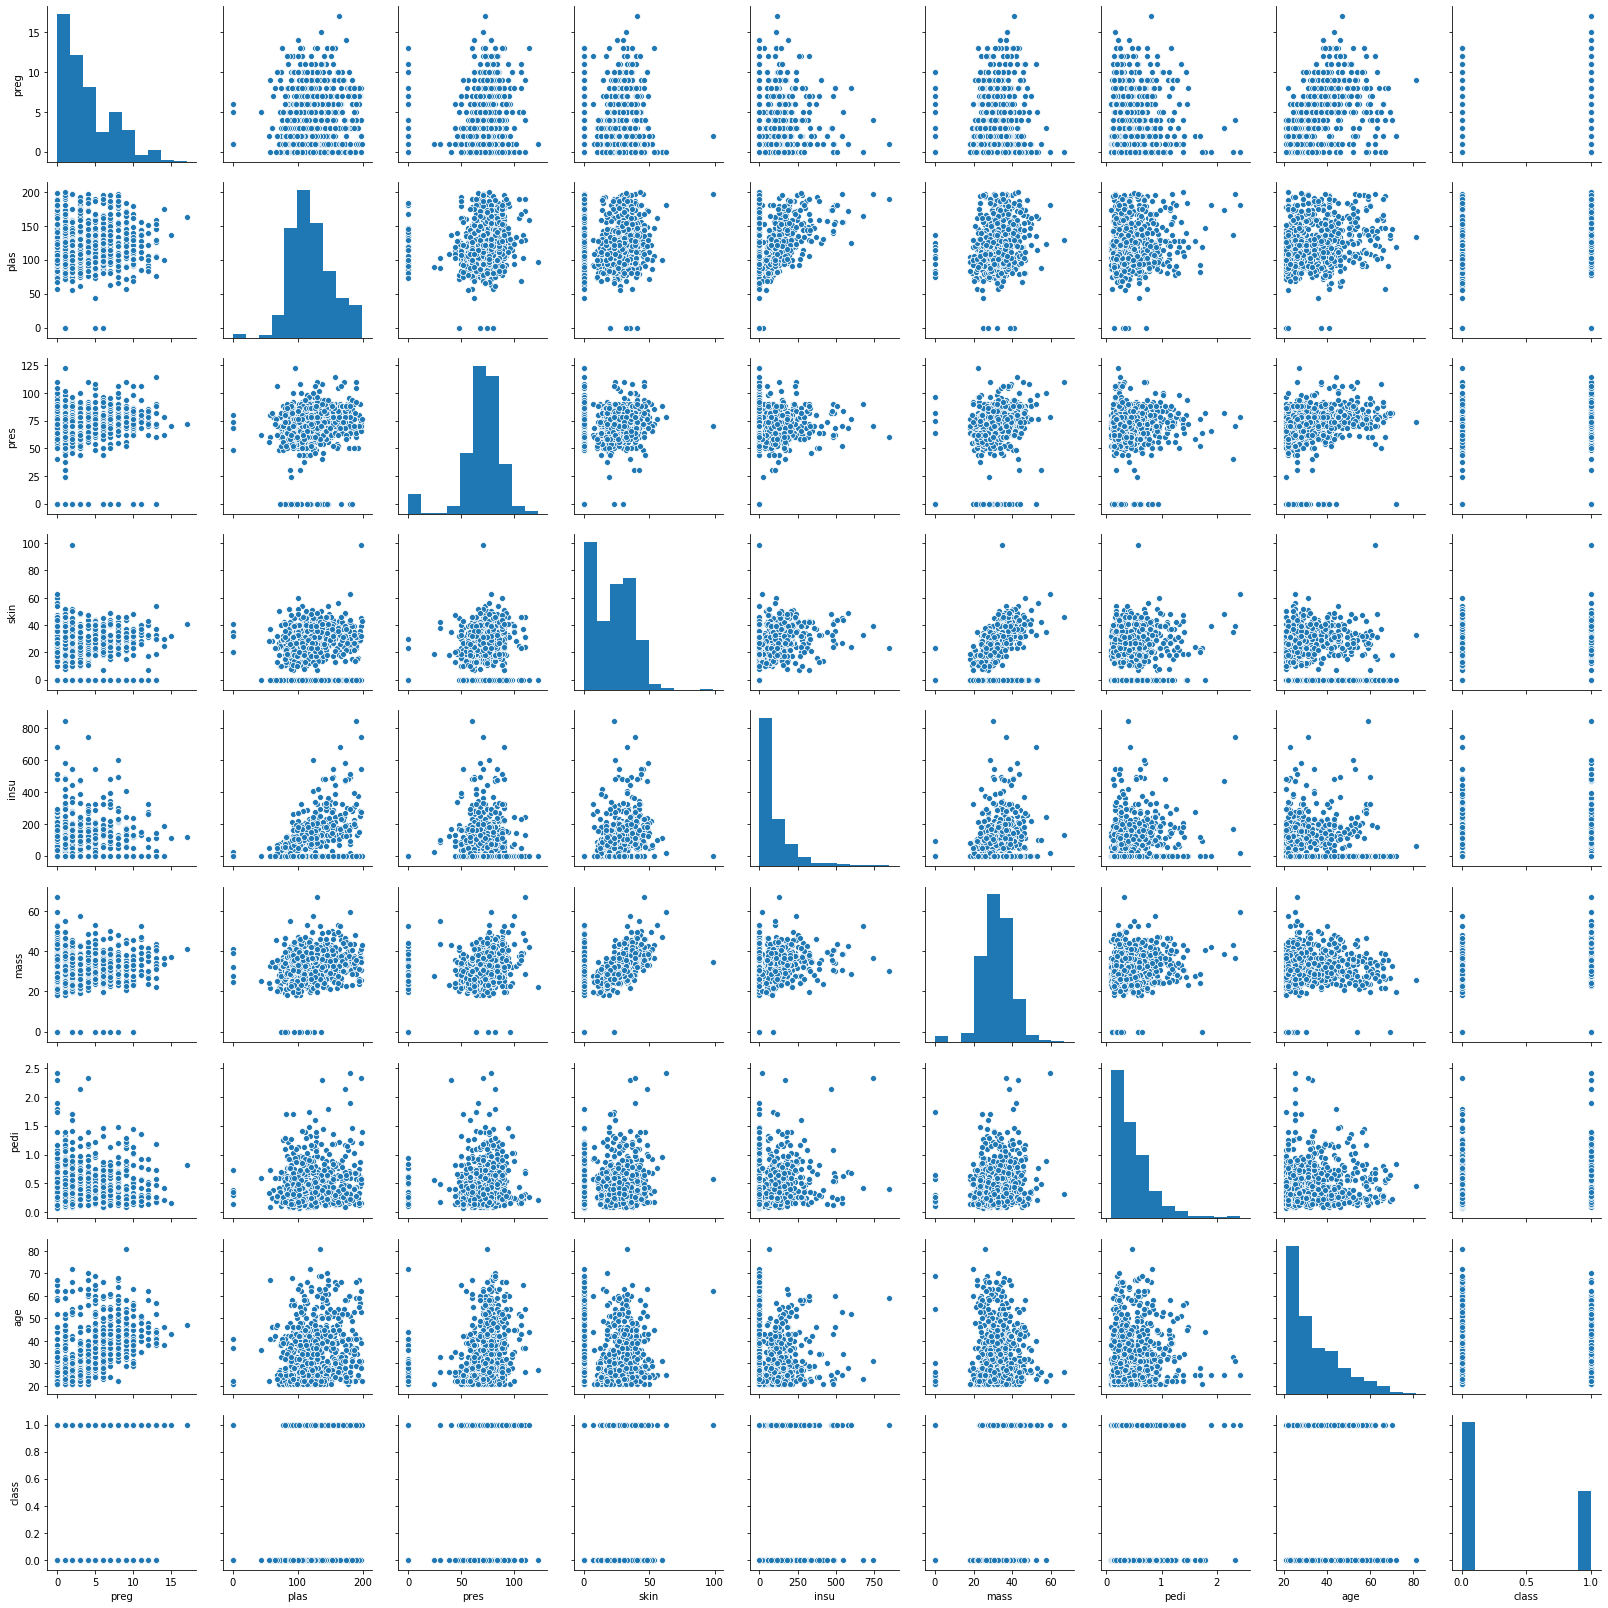

In [6]:
sns.pairplot(df)
plt.show()

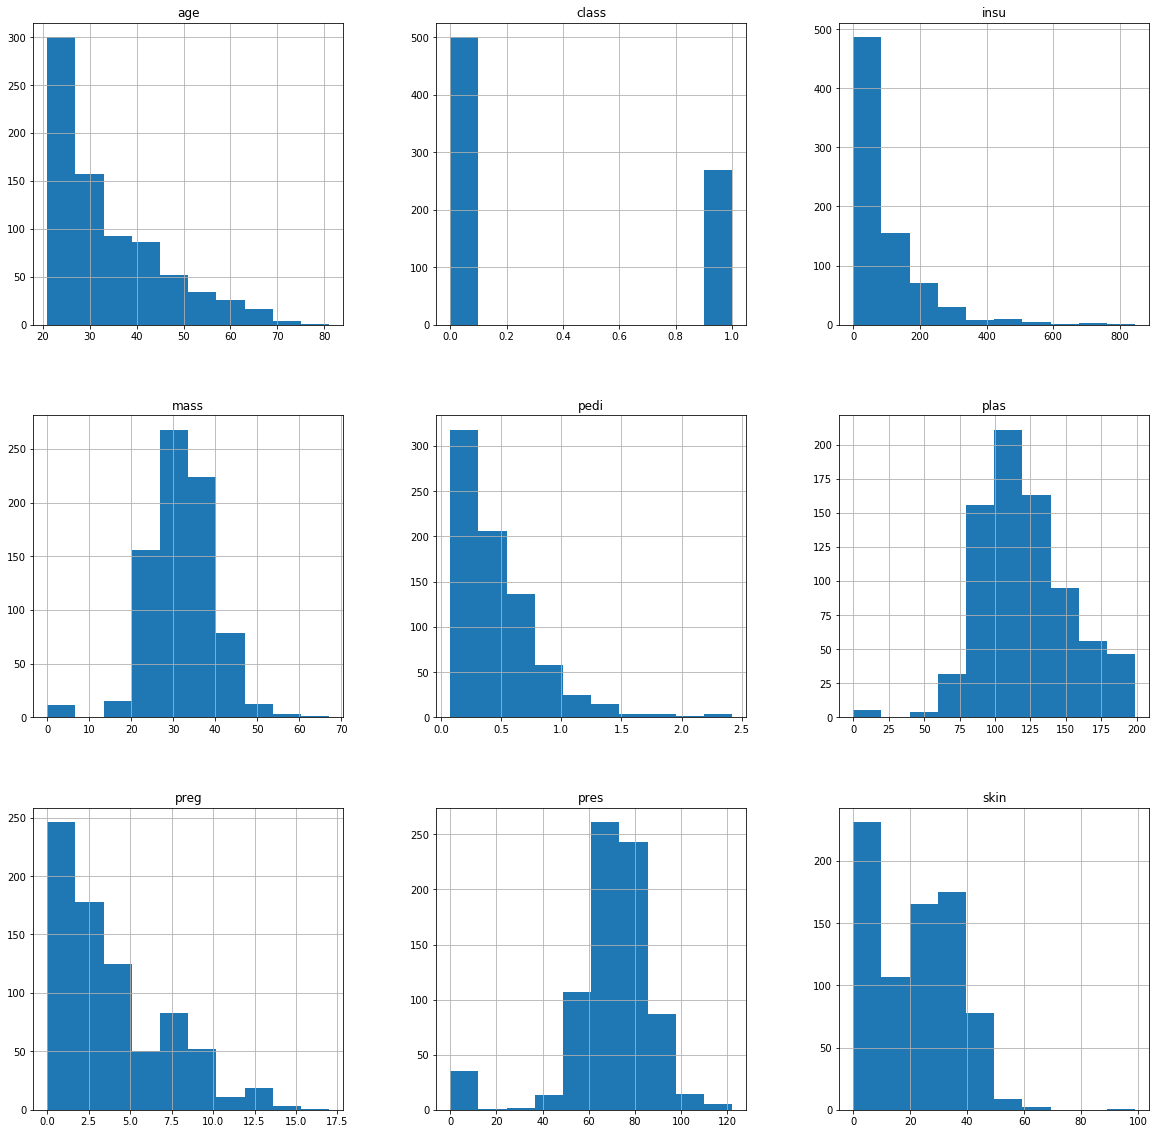

In [7]:
df.hist(figsize=(20,20))
plt.show()

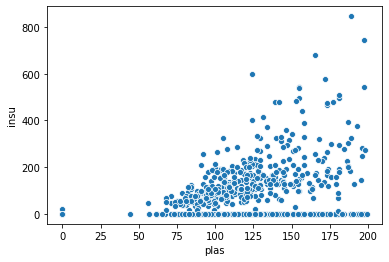

In [8]:
sns.scatterplot('plas', 'insu',data=df)
plt.show()

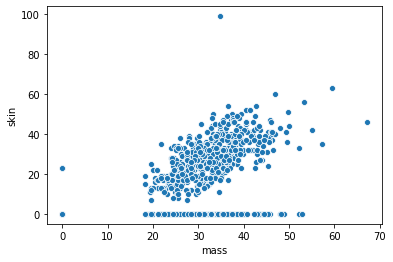

In [9]:
sns.scatterplot('mass','skin',data=df)
plt.show()

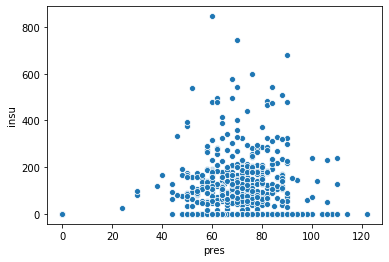

In [10]:
sns.scatterplot('pres', 'insu',data=df)
plt.show()

### With the scatteplots we  identify that some values in this variables are not possible since skin, mass (BMI), insulin, pressure (Diastolic blood),  and plasma (glucose) is not possible that some data points are equal to 0. 
### Thus, this implies that we need to do imputation (mean or median strategy) or drop these columns depending on how many values are 0 that need to be done on our train/test  stage

In [11]:
print('Plasma glucose concentration with zero values: ', len(df[df['plas'] == 0]))
print('Blood pressure with zero values: ', len(df[df['skin'] == 0]))
print('Insulin with zero values: ', len(df[df['insu'] == 0]))
print('BMI with zero values: ', len(df[df['mass'] == 0]))
print('Pressure with zero values: ', len(df[df['pres'] == 0]))

Plasma glucose concentration with zero values:  5
Blood pressure with zero values:  227
Insulin with zero values:  374
BMI with zero values:  11
Pressure with zero values:  35


identifying the age population of the data set


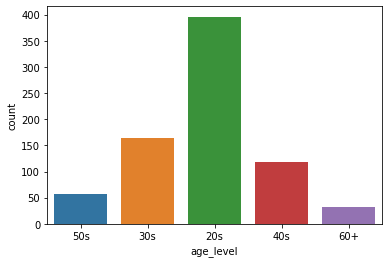

In [12]:
sns.countplot(x= 'age_level', data=df)
print("identifying the age population of the data set")
plt.show()

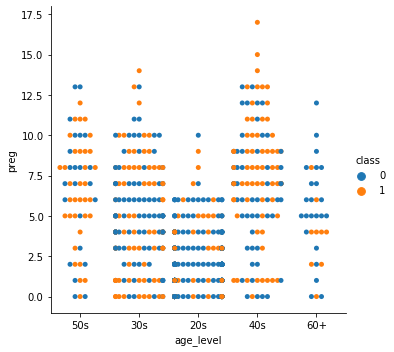

In [13]:
sns.catplot(x="age_level", y="preg", hue="class",kind="swarm", data=df);

Distribution of patients who where diagnosed with diabetes and ones that did not
class
0    500
1    268
dtype: int64


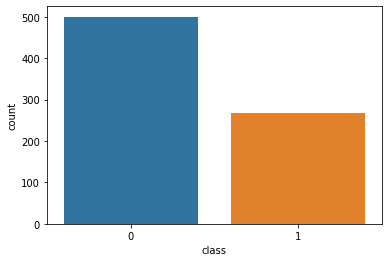

In [14]:
print("Distribution of patients who where diagnosed with diabetes and ones that did not")
print(df.groupby('class').size())
sns.countplot(x= 'class', data = df)
plt.show()

#### Dealing with imbalanced data because our dataset (768 records), 500 patients were not diagnosed with diabetes and 268 were diagnosed with it

In [15]:
df_ml = df.copy()
df_ml[['plas','pres','skin','insu','mass']] = df_ml[['plas','pres','skin','insu','mass']].replace(0,np.NaN)
df_ml.isnull().sum(axis=0) 

preg           0
plas           5
pres          35
skin         227
insu         374
mass          11
pedi           0
age            0
class          0
age_level      0
dtype: int64

In [16]:
df_imp = df.copy()
df_imp[['plas','skin','insu','mass']] = df_ml[['plas','skin','insu','mass']].replace(0,np.NaN)
df_imp.isnull().sum(axis=0) ## looking for null values within dataset 

df_imp = df_imp.drop('age_level', axis=1)
fill_NaN = Imputer(missing_values=np.nan, strategy='mean', axis=1)
imputed_DF = pd.DataFrame(fill_NaN.fit_transform(df_imp))
imputed_DF.columns = df_imp.columns
imputed_DF.index = df_imp.index

/Users/student1/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [17]:
imputed_DF = pd.concat([imputed_DF, df['age_level']], axis=1)

In [18]:
imputed_DF.describe()

,preg,plas,pres,skin,insu,mass,pedi,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.045838,69.105469,31.575277,97.695938,32.399030,0.471876,33.240885,0.348958
std,3.369578,31.452211,19.355807,10.428672,103.852129,7.024484,0.331329,11.760232,0.476951
min,0.000000,16.548571,0.000000,7.000000,14.000000,16.350333,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,24.000000,36.614804,27.400000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,32.000000,48.073357,32.150000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,39.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


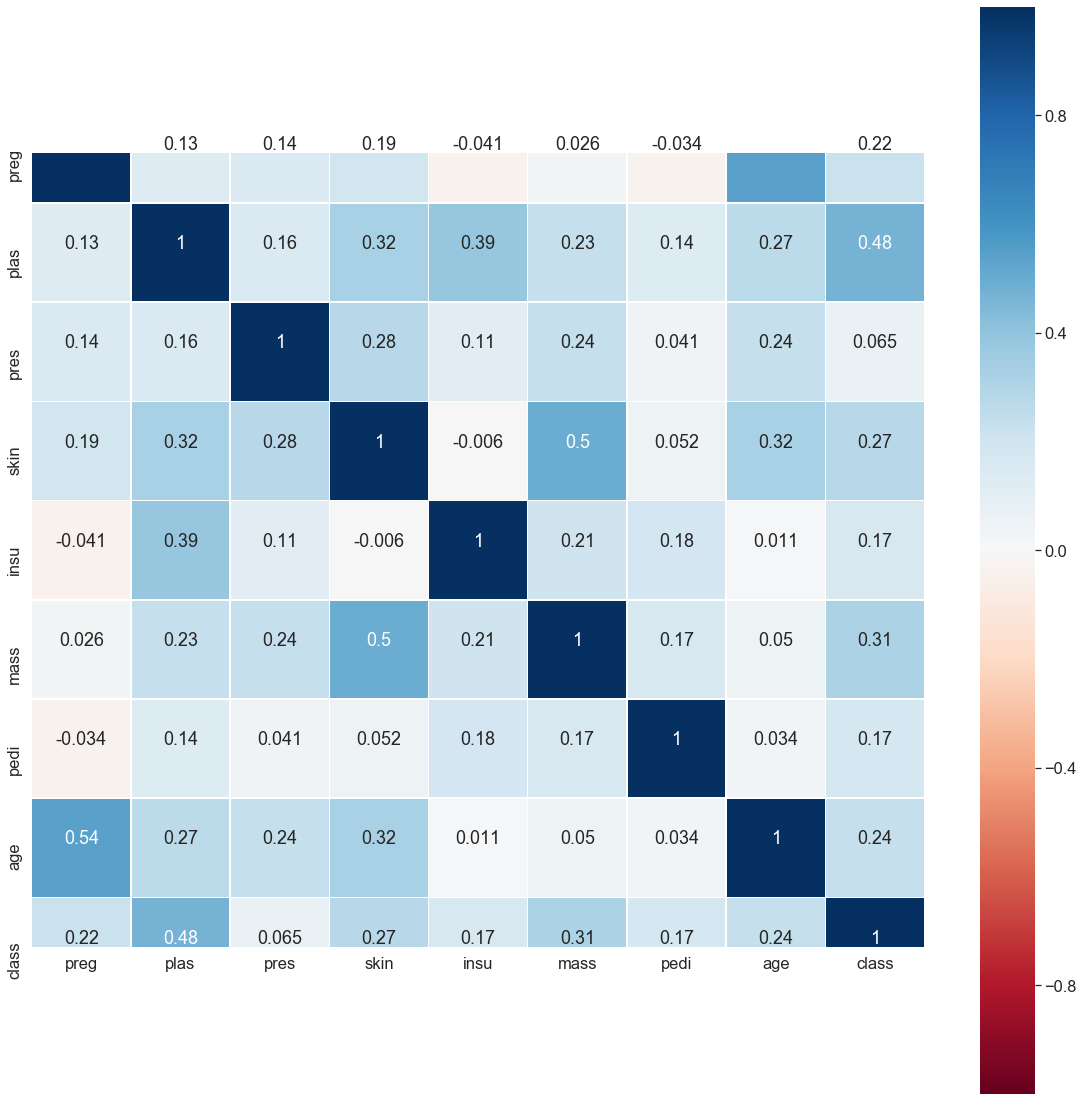

In [19]:
sns.set(font_scale=1.5)
annot_kws = {"ha": 'center',"va": 'bottom'}
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(imputed_DF.corr(), cmap='RdBu', ax=ax, annot=True, 
            linewidths=.5,vmax=1, vmin=-1, center=0, square=True, annot_kws=annot_kws)
plt.show()

### Correlation map displayed above, tells us how correlated is each variable to one another. By doing this we can also identify irrelevant variables that can be dropped from our original dataset. For example, we previously identify that there were 374 zero values on our insu (gluscose) column and 227 zero values on our skin column.

### Thus, our full data set is of 768 records whih means that half of the insu (gluscose) records are useless, and from the skin columns 1/3 of our data is useless as well. At the same time from our correlation map we can see a postitive correlation for skin and mass (BMI) at .5 and same for plas (glucose) for insulin at .39

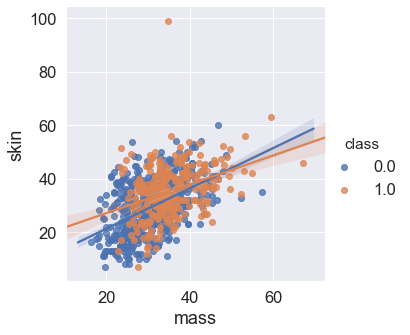

In [20]:
sns.lmplot(x="mass", y= 'skin', hue='class', data= imputed_DF)
plt.show()

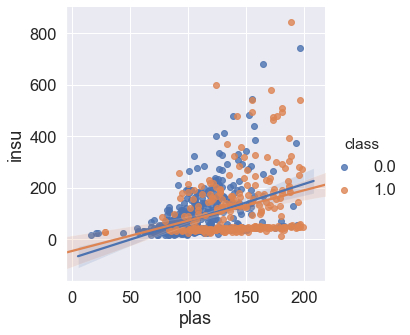

In [21]:
sns.lmplot(x="plas", y= 'insu', hue='class', data= imputed_DF)
plt.show()

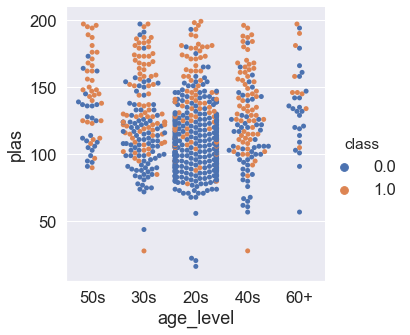

In [22]:
sns.catplot(x="age_level", y="plas", hue="class",kind="swarm", data=imputed_DF)
plt.show()

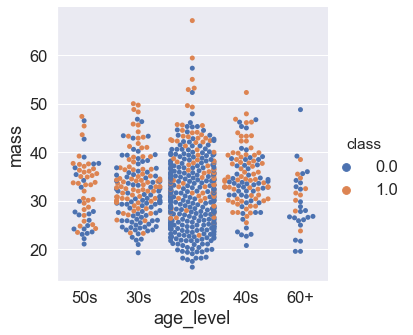

In [23]:
sns.catplot(x="age_level", y="mass", hue="class",kind="swarm", data=imputed_DF)
plt.show()

In [24]:
imputed_pre_ml = imputed_DF.drop(['insu', "skin"], axis=1)

In [25]:
pd.set_option("display.max_rows", None)
t = imputed_pre_ml.groupby(['age_level', 'class'])
t.describe().T

age_level          20s                     30s                     40s  \
class              0.0         1.0         0.0         1.0         0.0   
preg count  312.000000   84.000000   89.000000   76.000000   53.000000   
     mean     1.858974    2.154762    5.022472    4.947368    6.433962   
     std      1.631478    2.062248    2.840365    3.475226    3.576147   
     min      0.000000    0.000000    0.000000    0.000000    0.000000   
     25%      1.000000    0.000000    3.000000    2.000000    5.000000   
     50%      2.000000    2.000000    5.000000    5.000000    7.000000   
     75%      3.000000    3.000000    7.000000    8.000000    9.000000   
     max     10.000000    9.000000   13.000000   14.000000   13.000000   
plas count  312.000000   84.000000   89.000000   76.000000   53.000000   
     mean   106.695675  140.642857  113.348315  139.684861  109.509434   
     std     23.239070   30.152881   27.887396   31.722417   28.324780   
     min     16.548571   78.000000   44.000000   28.049429   57.000000   
     25%     91.750000  119.000000   93.000000  117.750000   92.000000   
     50%    105.000000  138.500000  110.000000  132.000000  106.000000   
     75%    120.250000  163.750000  125.000000  167.250000  126.000000   
     max    193.000000  199.000000  197.000000  197.000000  183.000000   
pres count  312.000000   84.000000   89.000000   76.000000   53.000000   
     mean    65.326923   65.428571   71.191011   67.881579   72.905660   
     std     17.854958   23.423439   17.838847   22.894522   17.818815   
     min      0.000000    0.000000    0.000000    0.000000    0.000000   
     25%     60.000000   61.500000   68.000000   64.000000   68.000000   
     50%     66.000000   70.000000   74.000000   73.000000   76.000000   
     75%     75.250000   80.000000   80.000000   78.500000   80.000000   
     max    122.000000  110.000000  110.000000  108.000000  106.000000   
mass count  312.000000   84.000000   89.000000   76.000000   53.000000   
     mean    30.461751   37.101190   30.923596   34.628204   33.318868   
     std      6.877405    7.863604    5.976926    6.022495    5.953669   
     min     16.350333   22.900000   19.300000   23.300000   20.800000   
     25%     25.175000   31.600000   26.000000   30.500000   30.000000   
     50%     29.850000   35.550000   30.000000   33.700000   33.300000   
     75%     35.300000   42.325000   34.900000   37.250000   37.200000   
     max     57.300000   67.100000   46.800000   50.000000   46.700000   
pedi count  312.000000   84.000000   89.000000   76.000000   53.000000   
     mean     0.416926    0.577786    0.470697    0.595250    0.422755   
     std      0.270859    0.427238    0.353834    0.383410    0.367681   
     min      0.078000    0.127000    0.084000    0.088000    0.085000   
     25%      0.229750    0.276000    0.245000    0.307000    0.197000   
     50%      0.340000    0.487500    0.342000    0.500000    0.285000   
     75%      0.548000    0.695250    0.660000    0.833000    0.444000   
     max      1.731000    2.420000    2.329000    2.288000    1.781000   
age  count  312.000000   84.000000   89.000000   76.000000   53.000000   
     mean    24.028846   25.369048   34.123596   34.092105   43.471698   
     std      2.501922    2.554371    3.088911    2.810351    2.728791   
     min     21.000000   21.000000   30.000000   30.000000   40.000000   
     25%     22.000000   23.000000   31.000000   31.750000   41.000000   
     50%     24.000000   25.000000   34.000000   33.500000   42.000000   
     75%     26.000000   28.000000   37.000000   36.250000   46.000000   
     max     29.000000   29.000000   39.000000   39.000000   49.000000   

age_level                      50s                     60+              
class              1.0         0.0         1.0         0.0         1.0  
preg count   65.000000   23.000000   34.000000   23.000000    9.000000  
     mean     7.553846    6.695652    6.529412    5.521739    3.777778  
     st

/Users/student1/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Users/student1/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


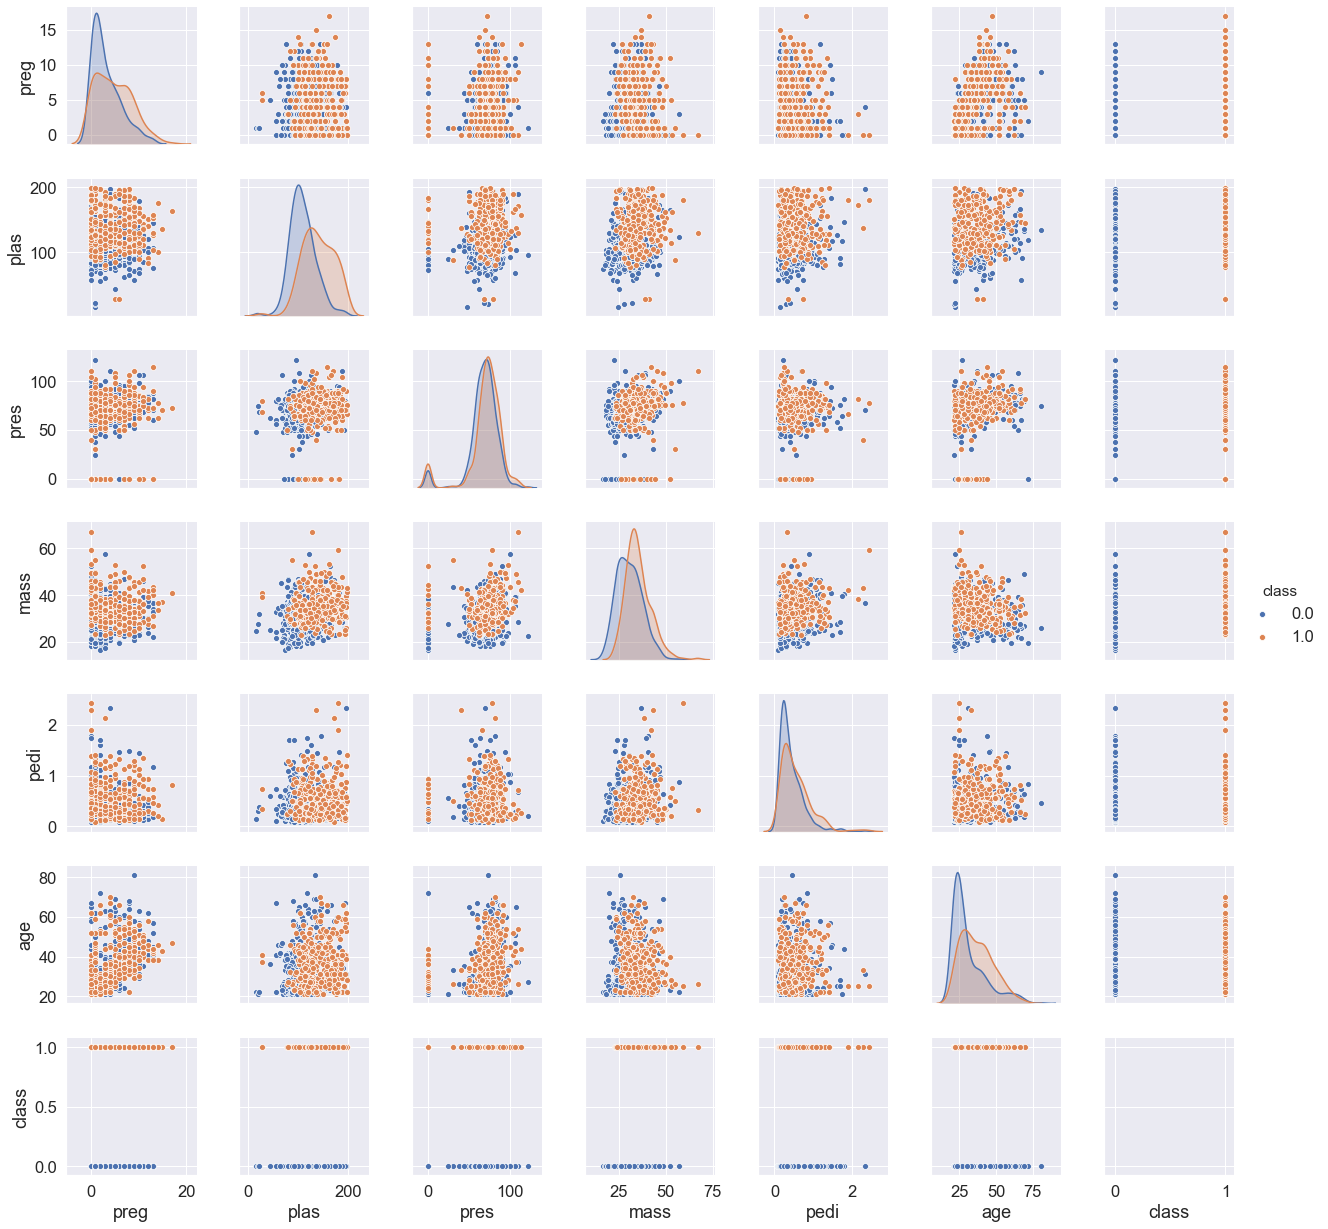

In [26]:
sns.pairplot(imputed_pre_ml, hue='class')
plt.show()

### Identifying possible values that could affect our data in order to consider them outliers, thus on our train/test stage we might want to approach this by making use of MinMax Scaler. 

In [27]:
imputed_pre_ml.shape

(768, 8)

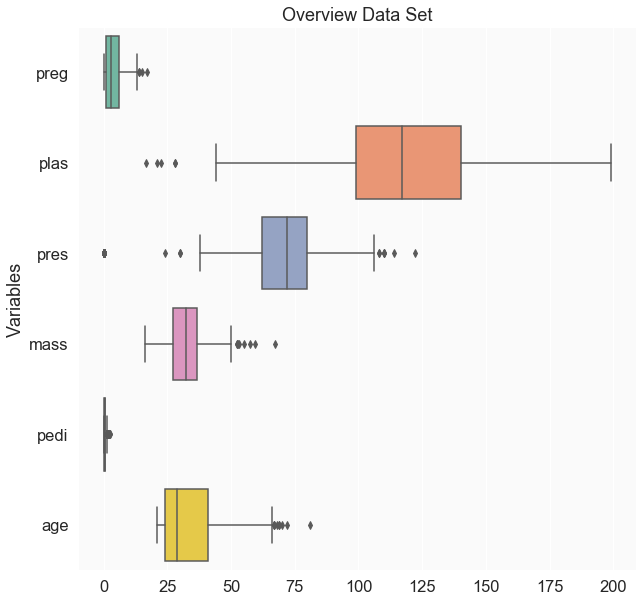

In [28]:
f, ax = plt.subplots(figsize=(10, 10))
ax.set_facecolor('#fafafa')
ax.set(ylim=(0, 200))
plt.ylabel('Variables')
plt.title("Overview Data Set")
ax = sns.boxplot(data = imputed_pre_ml.iloc[:,:6], 
  orient = 'h', 
  palette = 'Set2')